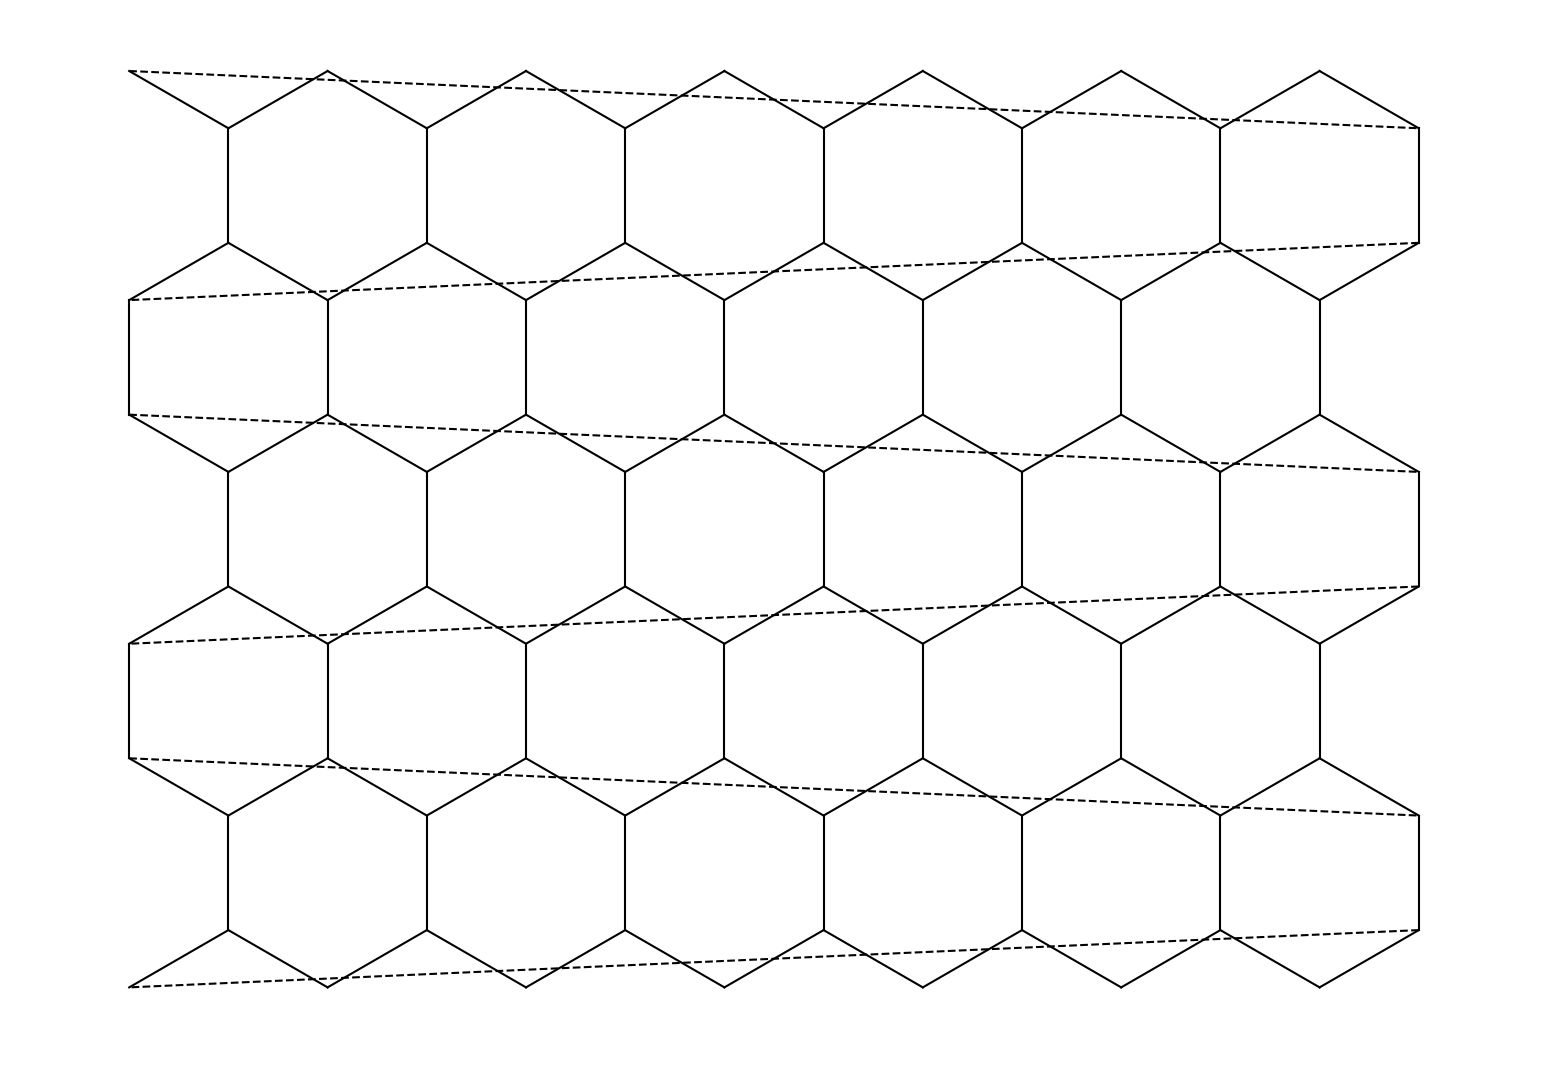

In [7]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from HF_spinspliting import *


# # 1. Image of a small ribbon
# fig = plt.figure(dpi = 200)
# ax = fig.gca()

# Lx = 10
# Ly = 4
# scatter_list = []

# for i in hopping_list(Lx, Ly):
#     x1, y1 = coordinate(i[0], Lx, Ly)
#     x2, y2 = coordinate(i[1], Lx, Ly)
#     ax.plot([x1, x2], [y1, y2], color = 'k')

# site_color = ['k', 'grey']
# for i in range(Lx * Ly):
#     x, y = coordinate(i, Lx, Ly)
#     color_ind = np.mod(i//Lx, 2)
#     ax.scatter(x, y, color = site_color[color_ind])

# ax.set_aspect(1)
# plt.savefig('./geometry/geometry_Lx10Ly4.png', bbox_inches='tight')
# # plt.show()


# 2. Illustration of Wilson loop

def rectangle_out(w, l_zig, l_arm, Lx, Ly):
    (xmin, xmax, ymin, ymax) = partition_geometry(w, l_zig, l_arm, Lx, Ly)[0:4]
    return ((xmin, ymin), xmax - xmin, ymax - ymin)

def rectangle_in(w, l_zig, l_arm, Lx, Ly, region = 'A'):
    xmin, xmax, ymin, ymax, xmin1, xmax1, ymin1, ymax1 = partition_geometry(w, l_zig, l_arm, Lx, Ly)
    if region == 'A':
        return ((xmin1, ymin1), xmax1 - xmin1, ymax1 - ymin1)
    elif region == 'B':
        return ((xmin1, ymin1), xmax1 - xmin1, ymax - ymin1)
    elif region == 'C':
        return ((xmin1, ymin), xmax1 - xmin1, ymax1 - ymin)
    elif region == 'D':
        return ((xmin1, ymin), xmax1 - xmin1, ymax - ymin)

def plot_partition(w, l_zig, l_arm, Lx, Ly, region = 'A', plot_sites = False, plot_text = False):
    fig = plt.figure(dpi = 300)
    ax = fig.add_subplot()
    ax.set_xlabel(r'$L_x$')
    ax.set_ylabel(r'$L_y$')
    plt.axis('off')
    # ax.set_title("Ribbon geometry, region " + region)
    ax.set_aspect("equal")
    ax.set_xlim(0.5, Lx+1)
    ax.set_ylim(0.5, Ly/4 * np.sqrt(3)+0.5)

    

    ### Plot hopping lines
    for j in hopping_list(Lx, Ly):
        x1, y1 = coordinate(j[0], Lx, Ly)
        x2, y2 = coordinate(j[1], Lx, Ly)
        # ax.plot([x1, x2], [y1, y2], color = "k", linewidth = 0.5, zorder = 2)
        if np.abs(x1 - x2) > 2:
            ax.plot([x1, x2], [y1, y2], color = "k", linewidth = 0.5, linestyle="--", zorder = 2) 
        else:
            ax.plot([x1, x2], [y1, y2], color = "k", linewidth = 0.5, zorder = 2)

    # ### Plot sites
    # if plot_sites == True:
    #     for i in range(Lx*Ly):
    #         coor = coordinate(i, Lx, Ly)
    #         if region == 'A':
    #             partition_list = listA(w, l_zig, l_arm, Lx, Ly)
    #         elif region == 'B':
    #             partition_list = listB(w, l_zig, l_arm, Lx, Ly)
    #         elif region == 'C':
    #             partition_list = listC(w, l_zig, l_arm, Lx, Ly)
    #         elif region == 'D':
    #             partition_list = listD(w, l_zig, l_arm, Lx, Ly)   

    #         if np.isin([i], partition_list) == True:
    #             ax.scatter(coor[0], coor[1], color = 'b', alpha= 1, s = 30, zorder = 3)
    #         else:
    #             if np.mod(i // Lx + 1, 2) == 1:
    #                 ax.scatter(coor[0], coor[1], color = 'k', s = 60, zorder = 3)
    #             else:
    #                 ax.scatter(coor[0], coor[1], color = 'gray', s = 60, zorder = 3)
    
    # if plot_text == True:
    #     for i in range(Lx*Ly):
    #         coor = coordinate(i, Lx, Ly)
    #         ax.text(coor[0], coor[1], str(i), fontsize='x-large', zorder = 4) 


    # rec_out_coor = rectangle_out(w, l_zig, l_arm, Lx, Ly)
    # rec_out = Rectangle(rec_out_coor[0], rec_out_coor[1], rec_out_coor[2],
    #                     color = 'g', alpha = 1, zorder = 0)
    # rec_in_coor = rectangle_in(w, l_zig, l_arm, Lx, Ly, region)
    # rec_in = Rectangle(rec_in_coor[0], rec_in_coor[1], rec_in_coor[2], 
    #                    color = 'w', alpha = 1, zorder = 1)
    # ax.add_patch(rec_out)
    # ax.add_patch(rec_in)
    plt.show()


Lx = 7
Ly = 12
w = 2
l_zig = 9
l_arm = 4


plot_partition(w, l_zig, l_arm, Lx, Ly, region = 'A', plot_sites=True, plot_text=False)